## Análisis no lineal mediante Árboles de Decisión

Para determinar si existe otro tipo de relación que explique la fuga respecto a las variables provistas por ECOMM, se procede a un análisis mediante un modelo simple (árbol de decisión) utilizando a la entropía como método para explicar estas variables.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('./data-analysis-test-data.csv')

In [5]:
df.head(2)

,ID,Meses de suscripción,Fuga,Índice de Satisfacción (IS),Var. del IS,Nro. de Casos de Soporte,Var. Nro. de Casos de Soporte,Prioridad del Soporte,Var. de la Prioridad del Soporte,Var. Nro. Logins,Var. Uso del Servicio,Var. Beneficio para el Cliente,Var. Días desde Ult. Conexión
0,1,134,0,124,8,0,0,0.0,0.0,0,0,-32,31
1,2,116,0,276,-20,0,0,0.0,0.0,86,0,-66,0


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [7]:
X = df.drop(columns=['Fuga','ID'])
y = df['Fuga']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0)

In [14]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [15]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [17]:
accuracy = decision_tree.score(X_test,y_test)
print("accuracy: ", accuracy)

accuracy:  0.9454094292803971


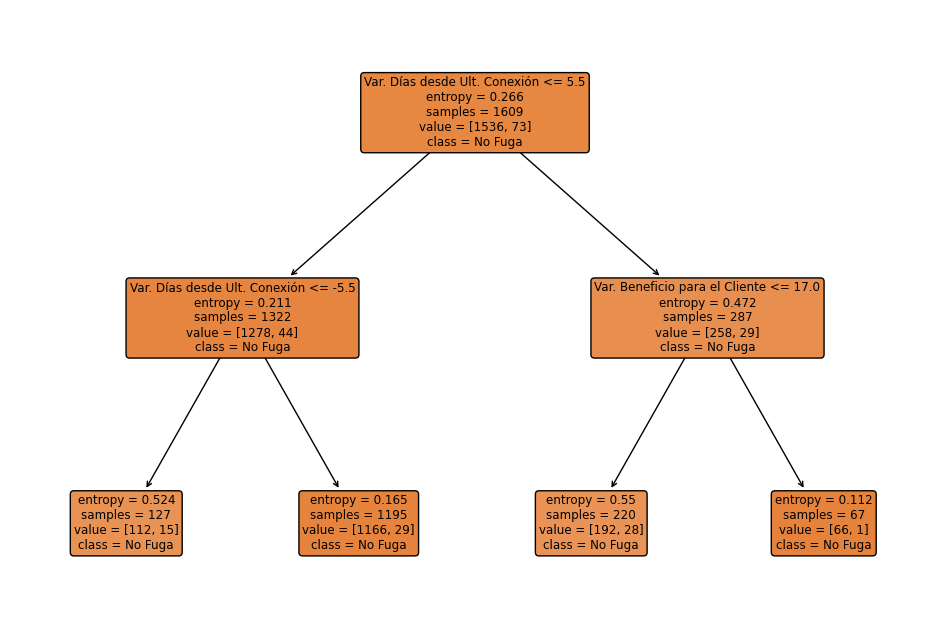

In [31]:
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['No Fuga', 'Fuga'], filled=True, rounded=True)
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [39]:
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor conjunto de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Evaluar el modelo en el conjunto de prueba
accuracy = best_model.score(X_test, y_test)
print("Accuracy del mejor modelo:", accuracy)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy del mejor modelo: 0.9454094292803971


In [42]:
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

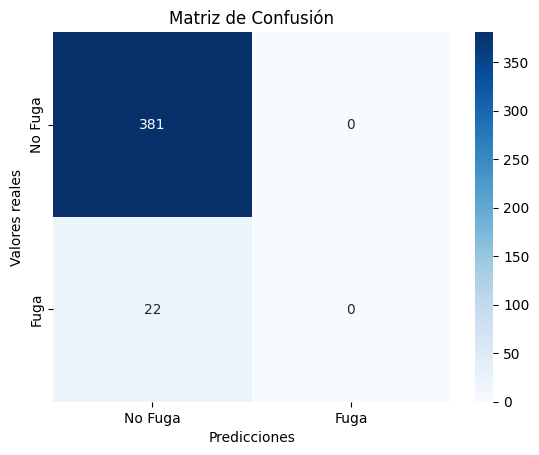

In [46]:
labels = ['No Fuga', 'Fuga']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

En la matriz de confusión expuesta arriba, vemos que si bien el accuracy puede ser bueno, tenemos muchos falsos negativos, es decir, nuestro modelo detecta que la persona no se fugó mientras que la realidad es que se desuscribió de nuestro producto.

Esto nos lleva a la conclusión que este modelo no se adapta a los datos.

Además de todas las variables que propusimos para llevar al siguiente nivel nuestro análisis, necesitamos más datos para poder tener un dataset balanceado.

También se pueden utilizar técnicas de oversampling o de undersampling para intentar balancear este conjunto.